## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the loan_data.csv into a DataFrame
loan = pd.read_csv('/Users/watcharin-p/Documents/GitHub/EDA/Random\ Forest\ \&\ Decision\ Tree/loan_data.csv ')

# Display the first few rows of the DataFrame
print(loan.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

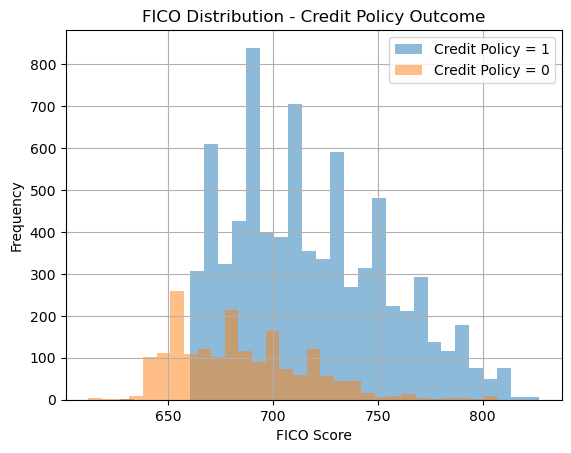

In [3]:
# Separate FICO scores for credit.policy outcome
fico_credit_policy = loan[loan['credit.policy'] == 1]['fico']
fico_no_credit_policy = loan[loan['credit.policy'] == 0]['fico']

# Plot the histograms
fico_credit_policy.hist(bins=30, alpha=0.5, label='Credit Policy = 1')
fico_no_credit_policy.hist(bins=30, alpha=0.5, label='Credit Policy = 0')

# Set plot labels and title
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('FICO Distribution - Credit Policy Outcome')
plt.legend()

# Display the histogram
plt.show()


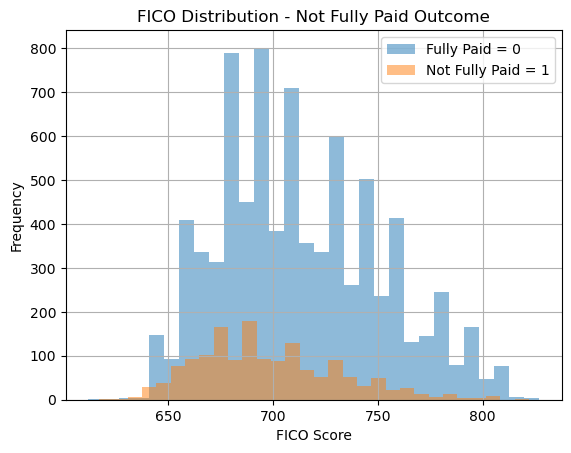

In [4]:
# Separate FICO scores for not.fully.paid outcome
fico_fully_paid = loan[loan['not.fully.paid'] == 0]['fico']
fico_not_fully_paid = loan[loan['not.fully.paid'] == 1]['fico']

# Plot the histograms
fico_fully_paid.hist(bins=30, alpha=0.5, label='Fully Paid = 0')
fico_not_fully_paid.hist(bins=30, alpha=0.5, label='Not Fully Paid = 1')

# Set plot labels and title
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('FICO Distribution - Not Fully Paid Outcome')
plt.legend()

# Display the histogram
plt.show()

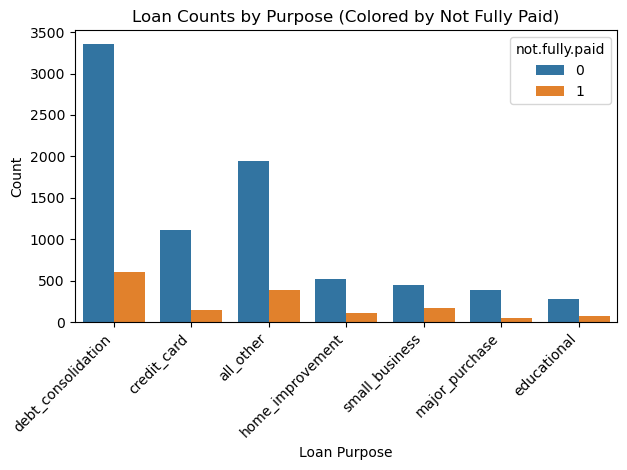

In [5]:
import seaborn as sns

# Create the countplot
sns.countplot(data=loan, x='purpose', hue='not.fully.paid')

# Set plot labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Counts by Purpose (Colored by Not Fully Paid)')

# Adjust x-axis labels rotation
plt.xticks(rotation=45, ha='right')

# Expand the x-axis
plt.tight_layout()

# Display the countplot
plt.show()

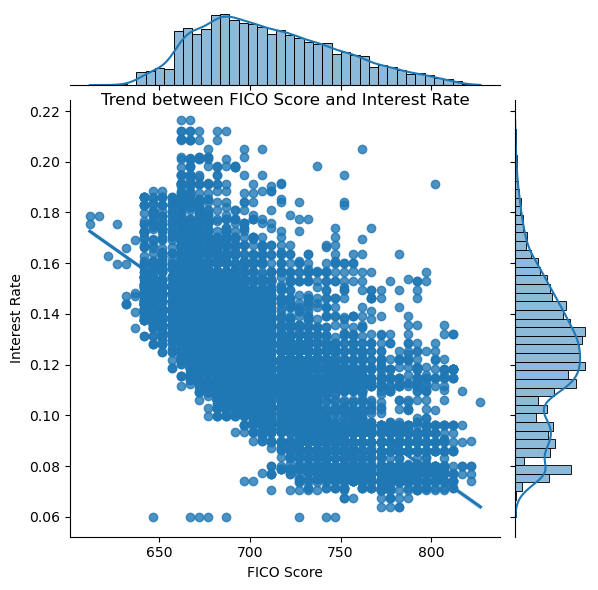

In [6]:
# Create the jointplot
sns.jointplot(data=loan, x='fico', y='int.rate', kind='reg')

# Set axis labels and title
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.title('Trend between FICO Score and Interest Rate', y=0.97)

# Display the jointplot
plt.show()

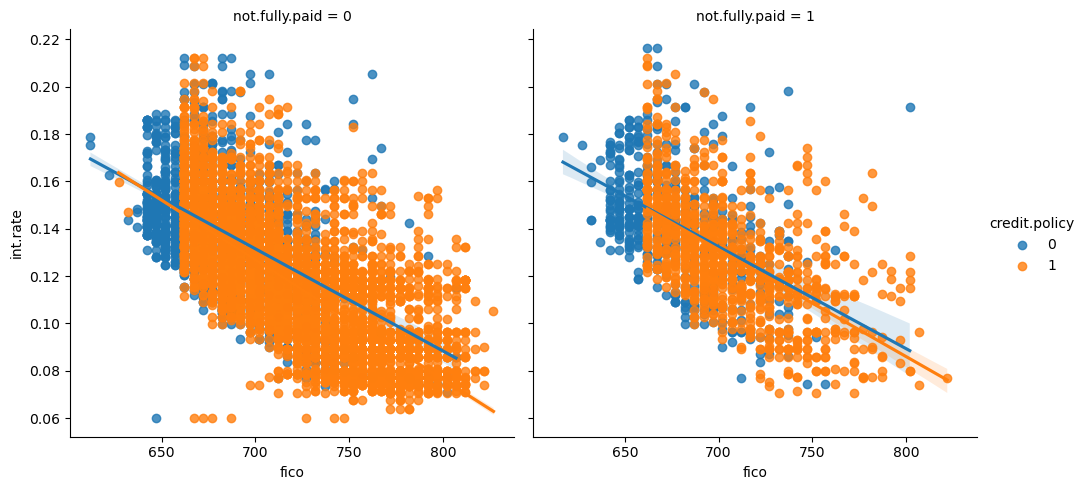

In [7]:
# Create the lmplot with separate columns for not.fully.paid and credit.policy
sns.lmplot(data=loan, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

# Set plot labels and titles
plt.xlabel('fico')
plt.ylabel('Interest Rate')

# Display the lmplot
plt.show()

## Setting up the Data

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorial Feature

In [9]:
# Create a list of columns containing 'purpose'
cat_feats = [col for col in loan.columns if 'purpose' in col]

# Print the list of columns
print(cat_feats)

['purpose']


In [10]:
# Create a list of columns containing 'purpose'
cat_feats = [col for col in loan.columns if 'purpose' in col]

# Create the final_data DataFrame with dummy variables
final_data = pd.get_dummies(loan, columns=cat_feats, drop_first=True)

# Display the final_data DataFrame
print(final_data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Create a list of columns containing 'purpose'
cat_feats = [col for col in loan.columns if 'purpose' in col]

# Create the final_data DataFrame with dummy variables
final_data = pd.get_dummies(loan, columns=cat_feats, drop_first=True)

# Separate the features (X) and target variable (y)
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7662, 18) (7662,)
Testing set shape: (1916, 18) (1916,)


## Training a Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
## Predictions and Evaluation of Decision Tree

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions from the test set
y_pred = tree.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.21      0.24      0.23       305

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.74      0.75      1916

Confusion Matrix:
[[1344  267]
 [ 232   73]]


In [15]:
## Predictions and Evaluation

In [16]:
# Display the predicted class for not fully paid
print("Predicted class for not fully paid (y_pred):")
print(y_pred)

Predicted class for not fully paid (y_pred):
[0 0 0 ... 0 0 0]


In [17]:
# Create the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.21      0.24      0.23       305

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.74      0.75      1916



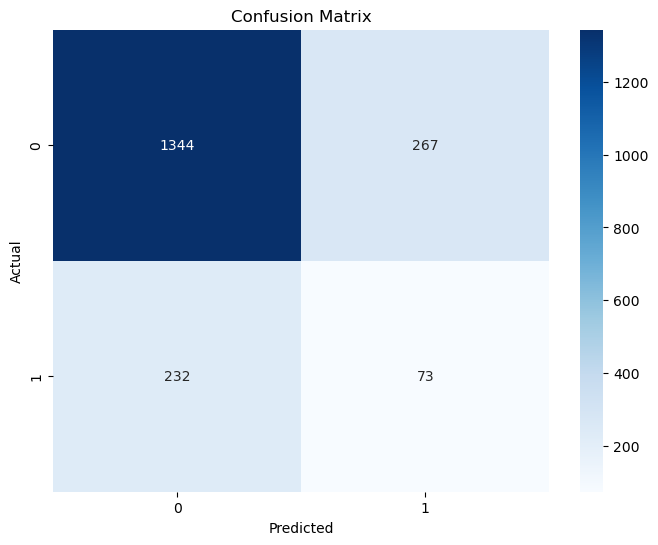

In [18]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
pip install scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

# Calculate performance metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

# Train and evaluate the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)

# Calculate performance metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Compare the performance metrics
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")
print("\n")
print("Random Forest:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")

Decision Tree:
Accuracy: 0.7317327766179541
Precision: 0.20057306590257878
Recall: 0.22950819672131148
F1-score: 0.21406727828746178


Random Forest:
Accuracy: 0.8413361169102297
Precision: 0.5384615384615384
Recall: 0.022950819672131147
F1-score: 0.0440251572327044
